# base setting

In [866]:
# Google drive mout
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [867]:
# Library import
import pandas as pd

import numpy as np
from numpy import linalg

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import seaborn as sns

import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import missingno as msno
import urllib
import re
import random

from datetime import datetime


import sympy
# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')


# from vega_datasets import data
# from tabulate import tabulate

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# plt.style.use('seaborn')
# plt.style.use('default')
# sns.set(font_scale=1)

In [868]:
# 그래프 한글폰트 개선
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] =False
# plt.rc('font', family='NanumGothic')

In [869]:
# 그래프 한글폰트 개선
# !apt -qq -y install fonts-nanum > /dev/null
 
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=10)
# fm._rebuild()
 
# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'
 
# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

# Read and Cleaning

## Read Data

|변수|내용|
|---|---|
|Name|게임의 이름|
|Platform|게임이 지원되는 플랫폼의 이름|
|Year|게임이 출시된 연도|
|Genre|게임의 장르|
|Publisher|게임을 배급한 회사|
|NA_Sales|북미지역에서의 출고량|
|EU_Sales|유럽지역에서의 출고량|
|JP_Sales|일본지역에서의 출고량|
|Other_Sales|기타지역에서의 출고량|

In [870]:
path = '/content/drive/Shareddrives/coding/aib/AIB_section1_project/data/vgchartz.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()
# Unnamed: 0 칼럼은 불필요함


(62426, 12)


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
0,0,God of War,Series,22nd Mar 05,Action,Sony Computer Entertainment,59.60m,NaN,NaN,NaN,NaN,NaN
1,1,Warriors,Series,30th Jun 97,Action,KOEI,49.95m,NaN,NaN,NaN,NaN,NaN
2,2,Devil May Cry,Series,16th Oct 01,Action,Capcom,27.00m,NaN,NaN,NaN,NaN,NaN
3,3,God of War (2018),All,20th Apr 18,Action,Sony Interactive Entertainment,23.00m,NaN,NaN,NaN,NaN,NaN
4,4,Dynasty Warriors,Series,30th Jun 97,Action,KOEI,21.28m,NaN,NaN,NaN,NaN,NaN


In [871]:
df.drop(columns=['Unnamed: 0'], inplace=True) # Unnamed: 0 칼럼 제거
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Shipped',
       'Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

## Cleaning

### Name

In [872]:
df.Name

0                             God of War    
1                               Warriors    
2                          Devil May Cry    
3                      God of War (2018)    
4                       Dynasty Warriors    
                        ...                 
62421                 World End Syndrome    
62422              XBlaze Lost: Memories    
62423                       Yoru, Tomosu    
62424                       Yoru, Tomosu    
62425    Yunohana SpRING! ~Mellow Times~    
Name: Name, Length: 62426, dtype: object

In [873]:
# 결측데이터 갯수
df.Name.isna().sum() # 결측치 없음

0

In [874]:
# 중복값 갯수
df.Name.duplicated().sum()

22938

In [875]:
# 중복값 보기
Name_count = pd.DataFrame(df.Name.value_counts())
filt_p = Name_count.Name != 1
Name_count[filt_p]

,Name
Plants vs. Zombies,19
Monopoly,15
Doom,14
Double Dragon,14
Elite,14
...,...
RealSports Soccer,2
Sega Marine Fishing,2
The Legend of Zelda: Breath of the Wild,2
Ultratron,2


In [876]:
df.Name = df.Name.str.strip()
df[df.Name == 'Plants vs. Zombies']

,Name,Platform,Year,Genre,Publisher,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
25073,Plants vs. Zombies,PSV,21st Feb 12,Misc,Sony Computer Entertainment,NaN,NaN,NaN,NaN,NaN,NaN
25074,Plants vs. Zombies,PS3,08th Feb 11,Misc,Sony Computer Entertainment,NaN,NaN,NaN,NaN,NaN,NaN
25075,Plants vs. Zombies,DS,18th Jan 11,Misc,PopCap Games,NaN,NaN,NaN,NaN,NaN,NaN
25076,Plants vs. Zombies,OSX,05th Mar 09,Misc,PopCap Games,NaN,NaN,NaN,NaN,NaN,NaN
25077,Plants vs. Zombies,And,14th Dec 11,Misc,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN
25078,Plants vs. Zombies,X360,08th Sep 10,Misc,PopCap Games,NaN,NaN,NaN,NaN,NaN,NaN
25079,Plants vs. Zombies,DSi,14th Mar 11,Misc,PopCap Games,NaN,NaN,NaN,NaN,NaN,NaN
25080,Plants vs. Zombies,And,14th Dec 11,Misc,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN
25081,Plants vs. Zombies,OSX,05th May 09,Misc,PopCap Games,NaN,NaN,NaN,NaN,NaN,NaN
25082,Plants vs. Zombies,WinP,22nd Jun 11,Misc,PopCap Games,NaN,NaN,NaN,NaN,NaN,NaN


### Platform

In [877]:
df.Platform

0        Series
1        Series
2        Series
3           All
4        Series
          ...  
62421       PS4
62422        PC
62423        NS
62424       PS4
62425        NS
Name: Platform, Length: 62426, dtype: object

In [878]:
df.Platform.value_counts().index

Index(['PC', 'PS2', 'DS', 'PS', 'PS4', 'XBL', 'NS', 'PSN', 'PS3', 'PSP',
       'XOne', 'X360', 'Wii', 'GBA', 'GB', 'SNES', '3DS', 'NES', 'PSV', 'All',
       'And', 'XB', 'GEN', 'DSiW', 'SAT', 'OSX', 'GC', 'VC', 'DC', 'WiiU',
       '2600', 'WW', 'PCE', 'Series', 'PS5', 'XS', 'N64', 'Linux', 'MS', 'GG',
       '3DO', 'SCD', 'WS', 'NG', 'iOS', 'Int', 'Lynx', 'DSi', '5200', 'AJ',
       'WinP', 'PCFX', 'BRW', 'NGage', '7800', 'GIZ', 'Arc', 'CV', 'C64', 'OR',
       'Amig', 'MSD', 'Ouya', 'VB', 'ACPC', 'Mob', 'ZXS', 'AST', 'iQue', 'GBC',
       'MSX', 'CDi', 'ApII', 'S32X', 'CD32', 'FMT', 'TG16', 'C128', 'Aco',
       'BBCM'],
      dtype='object')

#### 게임 플렛폼 종류

- PC
  - [PC game](https://en.wikipedia.org/wiki/PC_game)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Personal_computer%2C_exploded_5.svg/375px-Personal_computer%2C_exploded_5.svg.png">  
</center>


- PS2
  - [PlayStation 2](https://en.wikipedia.org/wiki/PlayStation_2)  
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/PS2-Versions.jpg/330px-PS2-Versions.jpg">  
</center>


- DS
  - [Nintendo DS](https://en.wikipedia.org/wiki/Nintendo_DS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Nintendo-DS-Fat-Blue.jpg/330px-Nintendo-DS-Fat-Blue.jpg">  
</center>


- PS
  - [PlayStation (console)](https://en.wikipedia.org/wiki/PlayStation_(console))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/PSX-Console-wController.jpg/375px-PSX-Console-wController.jpg">  
</center>


- PS4
  - [PlayStation 4](https://en.wikipedia.org/wiki/PlayStation_4)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Sony-PlayStation-4-PS4-wDualShock-4.jpg/330px-Sony-PlayStation-4-PS4-wDualShock-4.jpg">  
</center>


- XBL
  - [Xbox network](https://en.wikipedia.org/wiki/Xbox_network)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/Xbox_Play_Anywhere_logo.svg/330px-Xbox_Play_Anywhere_logo.svg.png">  
</center>


- NS
  - [Nintendo Switch](https://en.wikipedia.org/wiki/Nintendo_Switch)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Nintendo-Switch-wJoyCons-BlRd-Standing-FL.jpg/450px-Nintendo-Switch-wJoyCons-BlRd-Standing-FL.jpg">  
</center>


- PSN
  - [PlayStation Network](https://en.wikipedia.org/wiki/PlayStation_Network)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/PlayStation_Network_logo_%282015%29.png/420px-PlayStation_Network_logo_%282015%29.png">  
</center>


- PS3
  - [PlayStation 3](https://en.wikipedia.org/wiki/PlayStation_3)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Sony-PlayStation-3-CECHA01-wController-L.jpg/375px-Sony-PlayStation-3-CECHA01-wController-L.jpg">  
</center>


- PSP
  - [PlayStation Portable](https://en.wikipedia.org/wiki/PlayStation_Portable)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Psp-1000.jpg/330px-Psp-1000.jpg">  
</center>


- XOne
  - [Xbox One](https://en.wikipedia.org/wiki/Xbox_One)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Microsoft-Xbox-One-Console-Set-wKinect.jpg/450px-Microsoft-Xbox-One-Console-Set-wKinect.jpg">  
</center>


- X360
  - [Xbox 360](https://en.wikipedia.org/wiki/Xbox_360)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Xbox-360S-Console-Set.jpg/128px-Xbox-360S-Console-Set.jpg">  
</center>


- Wii
  - [Wii](https://en.wikipedia.org/wiki/Wii)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Wii-console.jpg/330px-Wii-console.jpg">  
</center>


- GBA
  - [Game Boy Advance](https://en.wikipedia.org/wiki/Game_Boy_Advance)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Nintendo-Game-Boy-Advance-Purple-FL.jpg/450px-Nintendo-Game-Boy-Advance-Purple-FL.jpg">  
</center>


- GB
  - [Game Boy](https://en.wikipedia.org/wiki/Game_Boy)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Game-Boy-FL.jpg/330px-Game-Boy-FL.jpg">  
</center>


- SNES
  - [Super Nintendo Entertainment System](https://en.wikipedia.org/wiki/Super_Nintendo_Entertainment_System)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/SNES-Mod1-Console-Set.jpg/375px-SNES-Mod1-Console-Set.jpg">  
</center>


- 3DS
  - [Nintendo 3DS](https://en.wikipedia.org/wiki/Nintendo_3DS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Nintendo-3DS-AquaOpen.jpg/225px-Nintendo-3DS-AquaOpen.jpg">  
</center>


- NES
  - [Nintendo Entertainment System](https://en.wikipedia.org/wiki/Nintendo_Entertainment_System)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/NES-Console-Set.jpg/330px-NES-Console-Set.jpg">  
</center>


- PSV
  - [PlayStation Vita](https://en.wikipedia.org/wiki/PlayStation_Vita)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/PlayStation-Vita-1101-FL.jpg/330px-PlayStation-Vita-1101-FL.jpg">  
</center>


- And
  - [Android (operating system)](https://en.wikipedia.org/wiki/Android_(operating_system))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Android_logo_2019_%28stacked%29.svg/182px-Android_logo_2019_%28stacked%29.svg.png">  
</center>


- XB
  - [Xbox (console)](https://en.wikipedia.org/wiki/Xbox_(console))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Xbox-console.jpg/375px-Xbox-console.jpg">  
</center>


- GEN
  - [Sega Genesis](https://en.wikipedia.org/wiki/Sega_Genesis)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Sega-Mega-Drive-JP-Mk1-Console-Set.jpg/375px-Sega-Mega-Drive-JP-Mk1-Console-Set.jpg">  
</center>


- DSiW
  - [List of DSiWare games and applications](https://en.wikipedia.org/wiki/List_of_DSiWare_games_and_applications)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/DSi_Ware_Logo.svg/330px-DSi_Ware_Logo.svg.png">  
</center>


- SAT
  - [Sega Saturn](https://en.wikipedia.org/wiki/Sega_Saturn)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Sega-Saturn-Console-Set-Mk1.png/375px-Sega-Saturn-Console-Set-Mk1.png">  
</center>


- OSX
  - [macOS](https://en.wikipedia.org/wiki/MacOS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/MacOS_wordmark_%282017%29.svg/188px-MacOS_wordmark_%282017%29.svg.png">  
</center>


- VC
  - [Virtual Console](https://en.wikipedia.org/wiki/Virtual_Console)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/Virtual_console_Logo.svg/375px-Virtual_console_Logo.svg.png">  
</center>


- GC
  - [GameCube](https://en.wikipedia.org/wiki/GameCube)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/GameCube-Set.jpg/330px-GameCube-Set.jpg">  
</center>


- DC
  - [Dreamcast](https://en.wikipedia.org/wiki/Dreamcast)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Dreamcast-Console-Set.png/330px-Dreamcast-Console-Set.png">  
</center>


- WiiU
  - [Wii U](https://en.wikipedia.org/wiki/Wii_U)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Wii_U_Console_and_Gamepad.png/330px-Wii_U_Console_and_Gamepad.png">  
</center>


- 2600
  - [Atari 2600](https://en.wikipedia.org/wiki/Atari_2600)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Atari-2600-Wood-4Sw-Set.png/330px-Atari-2600-Wood-4Sw-Set.png">  
</center>


- WW
  - [WiiWare](https://en.wikipedia.org/wiki/WiiWare)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Logo_wiiware.svg/300px-Logo_wiiware.svg.png">  
</center>


- PCE
  - [TurboGrafx-16/PC Engine](https://en.wikipedia.org/wiki/TurboGrafx-16)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/TurboGrafx16-Console-Set.jpg/375px-TurboGrafx16-Console-Set.jpg">  
</center>


- Series
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- XS
  - [Xbox Series X and Series S](https://en.wikipedia.org/wiki/Xbox_Series_X_and_Series_S)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Xbox_Series_S_with_controller.jpg/330px-Xbox_Series_S_with_controller.jpg">  
</center>


- PS5
  - [PlayStation 5](https://en.wikipedia.org/wiki/PlayStation_5)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/PlayStation_5_and_DualSense_with_transparent_background.png/330px-PlayStation_5_and_DualSense_with_transparent_background.png">  
</center>


- N64
  - [Nintendo 64](https://en.wikipedia.org/wiki/Nintendo_64)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/N64-Console-Set.jpg/330px-N64-Console-Set.jpg">  
</center>


- Linux
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- MS
  - [Master System](https://en.wikipedia.org/wiki/Master_System)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Sega-Master-System-Set.jpg/375px-Sega-Master-System-Set.jpg">  
</center>


- GG
  - [Game Gear](https://en.wikipedia.org/wiki/Game_Gear)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Sega-Game-Gear-WB.png/375px-Sega-Game-Gear-WB.png">  
</center>


- 3DO
  - [3DO Interactive Multiplayer](https://en.wikipedia.org/wiki/3DO_Interactive_Multiplayer)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/3DO-FZ1-Console-Set.jpg/450px-3DO-FZ1-Console-Set.jpg">  
</center>


- SCD
  - [Sega CD](https://en.wikipedia.org/wiki/Sega_CD)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Sega-CD-Model1-Set.jpg/375px-Sega-CD-Model1-Set.jpg">  
</center>


- WS
  - [WonderSwan](https://en.wikipedia.org/wiki/WonderSwan)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/WonderSwan-Color-Blue-Left.jpg/263px-WonderSwan-Color-Blue-Left.jpg">  
</center>


- NG
  - [Neo Geo](https://en.wikipedia.org/wiki/Neo_Geo)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Neo-Geo-AES-Console-Set.jpg/330px-Neo-Geo-AES-Console-Set.jpg">  
</center>


- iOS
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- Int
  - [Intellivision](https://en.wikipedia.org/wiki/Intellivision)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Intellivision-Console-Set.jpg/330px-Intellivision-Console-Set.jpg">  
</center>


- Lynx
  - [Atari Lynx](https://en.wikipedia.org/wiki/Atari_Lynx)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Atari-Lynx-I-Handheld.jpg/330px-Atari-Lynx-I-Handheld.jpg">  
</center>


- DSi
  - [List of DSiWare games and applications](https://en.wikipedia.org/wiki/List_of_DSiWare_games_and_applications)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/DSi_Ware_Logo.svg/330px-DSi_Ware_Logo.svg.png">  
</center>


- AJ
  - [Atari Jaguar](https://en.wikipedia.org/wiki/Atari_Jaguar)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Atari-Jaguar-Console-Set.jpg/330px-Atari-Jaguar-Console-Set.jpg">  
</center>


- 5200
  - [Atari 5200](https://en.wikipedia.org/wiki/Atari_5200)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Atari-5200-4-Port-wController-L.jpg/330px-Atari-5200-4-Port-wController-L.jpg">  
</center>


- WinP
  - [Windows Phone](https://en.wikipedia.org/wiki/Windows_Phone)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/en/4/48/WP8.1_Start_Screen.png">  
</center>


- PCFX
  - [PC-FX](https://en.wikipedia.org/wiki/PC-FX)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/PC-FX-Console-Set.jpg/330px-PC-FX-Console-Set.jpg">  
</center>


- BRW
  - [Browser game](https://en.wikipedia.org/wiki/Browser_game)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Freeciv-net-screenshot-2011-06-23.png/330px-Freeciv-net-screenshot-2011-06-23.png">  
</center>


- NGage
  - [N-Gage (device)](https://en.wikipedia.org/wiki/N-Gage_(device))
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Nokia-NGage-LL.jpg/390px-Nokia-NGage-LL.jpg">  
</center>


- 7800
  - [Atari 7800](https://en.wikipedia.org/wiki/Atari_7800)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Atari-7800-Console-Set.jpg/330px-Atari-7800-Console-Set.jpg">  
</center>


- GIZ
  - [Gizmondo](https://en.wikipedia.org/wiki/Gizmondo)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Gizmondo.jpg/375px-Gizmondo.jpg">  
</center>


- Arc
  - [Arcade game](https://en.wikipedia.org/wiki/Arcade_game)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Daikeien_amusement_arcade_2018-05-10.jpg/330px-Daikeien_amusement_arcade_2018-05-10.jpg">  
</center>


- CV
  - [ColecoVision](https://en.wikipedia.org/wiki/ColecoVision)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/ColecoVision-wController-L.jpg/450px-ColecoVision-wController-L.jpg">  
</center>


- C64
  - [Commodore 64](https://en.wikipedia.org/wiki/Commodore_64)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Commodore-64-Computer-FL.jpg/330px-Commodore-64-Computer-FL.jpg">  
</center>


- OR
  - [Oculus Rift](https://en.wikipedia.org/wiki/Oculus_Rift)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Oculus-Rift-CV1-Headset-Front_with_transparent_background.png/330px-Oculus-Rift-CV1-Headset-Front_with_transparent_background.png">  
</center>


- Amig
  - [Amiga CD32](https://en.wikipedia.org/wiki/Amiga_CD32)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Amiga-CD32-wController-L.jpg/375px-Amiga-CD32-wController-L.jpg">  
</center>


- MSD
  - [MS-DOS](https://en.wikipedia.org/wiki/MS-DOS)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/b/b6/StartingMsdos.png">  
</center>


- Ouya
  - [Ouya](https://en.wikipedia.org/wiki/Ouya)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/OUYA-Console-set-h.jpg/330px-OUYA-Console-set-h.jpg">  
</center>


- VB
  - [Virtual Boy](https://en.wikipedia.org/wiki/Virtual_Boy)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Virtual-Boy-Set.jpg/300px-Virtual-Boy-Set.jpg">  
</center>


- ACPC
  - [Amstrad CPC](https://en.wikipedia.org/wiki/Amstrad_CPC)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Amstrad_CPC464.jpg/435px-Amstrad_CPC464.jpg">  
</center>


- Mob
  - []()
<center>
<img alt="image" 
width=30% 
src="">  
</center>


- ZXS
  - [ZX Spectrum](https://en.wikipedia.org/wiki/ZX_Spectrum)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/ZXSpectrum48k.jpg/330px-ZXSpectrum48k.jpg">  
</center>


- AST
  - [Atari ST](https://en.wikipedia.org/wiki/Atari_ST)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/Atari_1040STf.jpg/330px-Atari_1040STf.jpg">  
</center>


- iQue
  - [iQue Player](https://en.wikipedia.org/wiki/IQue_Player)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Nintendo-N64-iQue-Player-FL.jpg/330px-Nintendo-N64-iQue-Player-FL.jpg">  
</center>


- GBC
  - [Game Boy Color](https://en.wikipedia.org/wiki/Game_Boy_Color)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Nintendo-Game-Boy-Color-FL.jpg/330px-Nintendo-Game-Boy-Color-FL.jpg">  
</center>


- MSX
  - [MSX](https://en.wikipedia.org/wiki/MSX)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Sony_HitBit_HB-10P_%28White_Background%29.jpg/330px-Sony_HitBit_HB-10P_%28White_Background%29.jpg">  
</center>


- CDi
  - [CD-i](https://en.wikipedia.org/wiki/CD-i)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/CD-i-910-Console-Set.jpg/330px-CD-i-910-Console-Set.jpg">  
</center>


- ApII
  - [Apple II](https://en.wikipedia.org/wiki/Apple_II)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Apple_II_typical_configuration_1977.png/330px-Apple_II_typical_configuration_1977.png">  
</center>


- S32X
  - [32X](https://en.wikipedia.org/wiki/32X)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Sega-Genesis-Model2-32X.jpg/330px-Sega-Genesis-Model2-32X.jpg">  
</center>


- CD32
  - [Amiga CD32](Amiga CD32)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Amiga-CD32-wController-L.jpg/375px-Amiga-CD32-wController-L.jpg">  
</center>


- FMT
  - [FM Towns Marty](https://en.wikipedia.org/wiki/FM_Towns_Marty)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/FM-Towns-Marty-Console-Set.jpg/330px-FM-Towns-Marty-Console-Set.jpg">  
</center>


- TG16
  - [TurboGrafx-16](https://en.wikipedia.org/wiki/TurboGrafx-16)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/TurboGrafx16-Console-Set.jpg/375px-TurboGrafx16-Console-Set.jpg">  
</center>


- C128
  - [Commodore 128](https://en.wikipedia.org/wiki/Commodore_128)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Commodore-128.jpg/420px-Commodore-128.jpg">  
</center>


- Aco
  - [Acorn Electron](https://en.wikipedia.org/wiki/Acorn_Electron)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Acorn_Electron_4x3.jpg/330px-Acorn_Electron_4x3.jpg">  
</center>


- BBCM
  - [BBC Micro](https://en.wikipedia.org/wiki/BBC_Micro)
<center>
<img alt="image" 
width=30% 
src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/BBC_Micro_Front_Restored.jpg/375px-BBC_Micro_Front_Restored.jpg">  
</center>























<center>
<img alt="image" 
width=70% 
src="http://2.bp.blogspot.com/-OVbxM9S3i_g/VaJO_m19M9I/AAAAAAAAABw/-6jWX6KuyRQ/s1600/GamePlatforms.jpg">  
</center>

- [게임 기획자로 사는 지혜](http://makhunta.blogspot.com/2015/07/1.html)  
- [games Platform Totals](https://www.vgchartz.com/charts/platform_totals/Hardware.php/)

In [879]:
pc = ['PC', 'OSX', 'Series', 'Linux', 'BRW', 'MSD', 'ACPC', 'MSX', 'ApII', 'All']
mobile = ['And', 'iOS', 'WinP', 'Mob']
console = ['PS2', 'PS', 'PS4', 'PS3', 'XOne', 'X360', 'Wii', 'SNES', 'NES', 'XB', 'GEN', 'SAT', 'VC', 'GC', 'DC', 
           '2600', 'PCE', 'XS', 'PS5', 'N64', 'MS', '3DO', 'SCD', 'NG', 'Int', 'DSi', 'AJ', '5200', 'PCFX', '7800', 'CV', 'C64', 
           'Amig', 'Ouya', 'ZXS', 'AST', 'iQue', 'CDi', 'S32X', 'CD32', 'FMT', 'TG16', 'C128', 'Aco', 'BBCM']
portable = ['DS', 'NS', 'PSP', 'GBA', 'GB', '3DS', 'PSV', 'WiiU', 'GG', 'WS', 'Lynx', 'NGage', 'GIZ', 'GBC', ]
arcade = ['Arc']
network = ['XBL', 'PSN']
vr = ['OR', 'VB', 'DSiW', 'WW']

In [880]:
pc = ['PC', 'OSX', 'Series', 'Linux', 'BRW', 'MSD', 'ACPC', 'MSX', 'ApII', 'All']
console = ['PS2', 'PS', 'PS4', 'PS3', 'XOne', 'X360', 'Wii', 'SNES', 'NES', 'XB', 'GEN', 'SAT', 'VC', 'GC', 'DC', 'XBL', 'PSN', 'Arc',
           '2600', 'PCE', 'XS', 'PS5', 'N64', 'MS', '3DO', 'SCD', 'NG', 'Int', 'DSi', 'AJ', '5200', 'PCFX', '7800', 'CV', 'C64', 
           'Amig', 'Ouya', 'ZXS', 'AST', 'iQue', 'CDi', 'S32X', 'CD32', 'FMT', 'TG16', 'C128', 'Aco', 'BBCM', 'OR', 'VB', 'DSiW', 'WW']
portable = ['DS', 'NS', 'PSP', 'GBA', 'GB', '3DS', 'PSV', 'WiiU', 'GG', 'WS', 'Lynx', 'NGage', 'GIZ', 'GBC', 'And', 'iOS', 'WinP', 'Mob']

In [881]:
df['Platform_2'] = 'pc'
# df.iloc[df[df.Platform.isin(mobile)].index, -1] = 'mobile'
df.iloc[df[df.Platform.isin(console)].index, -1] = 'console'
df.iloc[df[df.Platform.isin(portable)].index, -1] = 'portable'
# df.iloc[df[df.Platform.isin(arcade)].index, -1] = 'arcade'
# df.iloc[df[df.Platform.isin(network)].index, -1] = 'network'
# df.iloc[df[df.Platform.isin(vr)].index, -1] = 'vr'

In [882]:
df['Platform_2'].value_counts()

console     32148
portable    15351
pc          14927
Name: Platform_2, dtype: int64

In [883]:
df['Platform_2'].isna().sum()

0

### Year

In [884]:
# type
df.Year.dtypes # 정수형으로 변환 필요

dtype('O')

In [885]:
# 결측데이터 보기
df.Year.isna().sum() # 결측치 없음

0

In [886]:
# data 확인
df.Year.value_counts()

N/A              5643
01st Jan 94       513
01st Jan 93       450
01st Jan 92       388
01st Jan 95       353
                 ... 
04th May 18         1
04th Oct 95         1
26th Jul 95         1
10th May 03         1
11th Aug 16         1
Name: Year, Length: 7818, dtype: int64

In [887]:
df.Year

0        22nd Mar 05  
1        30th Jun 97  
2        16th Oct 01  
3        20th Apr 18  
4        30th Jun 97  
             ...      
62421    26th Apr 18  
62422    11th Aug 16  
62423    30th Jul 20  
62424    30th Jul 20  
62425    28th Feb 19  
Name: Year, Length: 62426, dtype: object

In [888]:
df.Year = df.Year.str.strip()

In [889]:
df.Year = df.Year.str.slice(-2,) 

In [890]:
df.loc[df[df.Year == '/A'].index, 'Year'] = 9999
df.Year.value_counts()

9999    5643
09      4358
10      3587
11      3390
08      2935
14      2896
07      2525
06      2095
05      1810
13      1739
02      1724
03      1720
15      1676
04      1600
12      1581
17      1557
00      1546
18      1530
01      1475
20      1453
16      1346
19      1289
99      1272
96      1223
94      1161
95      1152
98      1092
97      1036
93      1033
92       935
91       778
90       658
89       427
21       404
83       297
88       292
87       270
82       211
86       159
22       115
85       101
84        99
70        82
81        50
78        45
80        35
77        11
79         8
23         2
71         1
75         1
73         1
Name: Year, dtype: int64

In [891]:
df.Year = df.Year.astype(int) # 데이터타입 정수형으로 변환
df.Year.dtypes

dtype('int64')

In [892]:

print(f"""\
출시년도가 40 이하인 케이스 수    : {df.query('Year <= 40').shape[0]}
40 < 출시년도 <=99 케이스 수      : {df.query('Year > 40 & Year <= 99').shape[0]}
""")

출시년도가 40 이하인 케이스 수    : 44353
40 < 출시년도 <=99 케이스 수      : 12430



In [893]:
filt_40 = df.Year <= 40 # 출시년도가 40 이하인 케이스 필터링
df[filt_40].index
df.iloc[df[filt_40].index, 2] = df.iloc[df[filt_40].index, 2] + 2000 # 기존값에 +2000
df[filt_40].Year.value_counts() # 출시년도가 40 이하인 케이스 +2000 완료

2009    4358
2010    3587
2011    3390
2008    2935
2014    2896
2007    2525
2006    2095
2005    1810
2013    1739
2002    1724
2003    1720
2015    1676
2004    1600
2012    1581
2017    1557
2000    1546
2018    1530
2001    1475
2020    1453
2016    1346
2019    1289
2021     404
2022     115
2023       2
Name: Year, dtype: int64

In [894]:
filt_99 = df.Year <= 99 # 출시년도가 99 이하인 케이스 필터링
df[filt_99].index
df.iloc[df[filt_99].index, 2] = df.iloc[df[filt_99].index, 2] + 1900 # 기존값에 +1900
df[filt_99].Year.value_counts() # 출시년도가 30 이하인 케이스 +1900 완료

1999    1272
1996    1223
1994    1161
1995    1152
1998    1092
1997    1036
1993    1033
1992     935
1991     778
1990     658
1989     427
1983     297
1988     292
1987     270
1982     211
1986     159
1985     101
1984      99
1970      82
1981      50
1978      45
1980      35
1977      11
1979       8
1971       1
1975       1
1973       1
Name: Year, dtype: int64

In [895]:
df.Year.value_counts()

9999    5643
2009    4358
2010    3587
2011    3390
2008    2935
2014    2896
2007    2525
2006    2095
2005    1810
2013    1739
2002    1724
2003    1720
2015    1676
2004    1600
2012    1581
2017    1557
2000    1546
2018    1530
2001    1475
2020    1453
2016    1346
2019    1289
1999    1272
1996    1223
1994    1161
1995    1152
1998    1092
1997    1036
1993    1033
1992     935
1991     778
1990     658
1989     427
2021     404
1983     297
1988     292
1987     270
1982     211
1986     159
2022     115
1985     101
1984      99
1970      82
1981      50
1978      45
1980      35
1977      11
1979       8
2023       2
1971       1
1975       1
1973       1
Name: Year, dtype: int64

### Genre

In [896]:
df.Genre.value_counts()

Misc                9292
Action              8349
Adventure           6022
Sports              5562
Role-Playing        5508
Shooter             5288
Platform            3899
Strategy            3622
Puzzle              3432
Racing              3334
Simulation          3043
Fighting            2307
Action-Adventure    1681
Visual Novel         474
Music                277
Party                146
MMO                  112
Education             33
Board Game            25
Sandbox               20
Name: Genre, dtype: int64

In [897]:
df.Genre.isna().sum()

0

### Publisher

In [898]:
df.Publisher.isna().sum() # 결측치 없음

0

In [899]:
df.Publisher.value_counts()

Unknown                     7518
Sega                        2204
Ubisoft                     1662
Electronic Arts             1611
Activision                  1572
                            ... 
Vision Soft                    1
Terry Cavanagh                 1
Mossmouth, LLC                 1
Honey Soft                     1
Metro Trains Melbourne         1
Name: Publisher, Length: 3368, dtype: int64

### Total_Shipped

In [900]:
df.Total_Shipped.isna().sum()

58236

In [901]:
df.Total_Shipped.value_counts()

1.00m     248
0.10m     112
0.50m     105
2.00m      88
0.12m      87
         ... 
18.35m      1
29.66m      1
68.34m      1
3.04m       1
1.97m       1
Name: Total_Shipped, Length: 735, dtype: int64

In [902]:
df.Total_Shipped.str.contains(pat='[a-zA-Z]', regex=True).sum() # 문자가 있는 것

4190

In [903]:
m_index = df.Total_Shipped.str.contains(pat='[m]', regex=True).index # m이 붙어있는 인덱스 저장

In [904]:
df['Total_Shipped'].replace('[a-zA-Z]', '', regex=True, inplace=True) # 문자 제거

In [905]:
df['Total_Shipped'] = df['Total_Shipped'].astype(float) # 테이터타입 소수형 변형

In [906]:
df.loc[m_index, 'Total_Shipped'] = df.loc[m_index, 'Total_Shipped'] * 1000000 # 기존값에 x 1 million

In [907]:
df.Total_Shipped.describe()

count    4.190000e+03
mean     4.623167e+06
std      2.031379e+07
min      0.000000e+00
25%      2.200000e+05
50%      1.000000e+06
75%      2.817500e+06
max      4.964000e+08
Name: Total_Shipped, dtype: float64

### XX_Sales

In [908]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Shipped',
       'Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Platform_2'],
      dtype='object')

In [909]:
df[['Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62426 entries, 0 to 62425
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Total_Sales  18980 non-null  object
 1   NA_Sales     12685 non-null  object
 2   PAL_Sales    12874 non-null  object
 3   JP_Sales     6756 non-null   object
 4   Other_Sales  15183 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


In [910]:
df[['Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']].head()

,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [911]:
for i in ['Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']:
  print(i, ' : ', df[i].str.contains(pat='[^\d]', regex=True).sum()) # 숫자가 아닌것

Total_Sales  :  18980
NA_Sales  :  12685
PAL_Sales  :  12874
JP_Sales  :  6756
Other_Sales  :  15183


In [912]:
for i in ['Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']:
  print(df[i].str.contains(pat='[m]', regex=True).sum()) # m이 있는 것

18980
12685
12874
6756
15183


In [913]:
for i in ['Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']:
  index_m = df[i].str.contains(pat='[m]', regex=True).index # m이 붙어있는 것들의 인덱스 저장
  df[i].replace('[a-zA-Z]', '', regex=True, inplace=True) # 문자 제거
  df[i] = df[i].astype(float) # 테이터타입 소수형 변형
  df.loc[m_index, i] = df.loc[m_index, i] * 1000000 # 기존값에 x 1 million

In [914]:
df[['Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']].describe()

,Total_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales
count,1.898000e+04,1.268500e+04,1.287400e+04,6.756000e+03,1.518300e+04
mean,3.513883e+05,2.659566e+05,1.505049e+05,1.030743e+05,4.328855e+04
std,8.092720e+05,4.953201e+05,3.934575e+05,1.722055e+05,1.268748e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+04,5.000000e+04,1.000000e+04,2.000000e+04,0.000000e+00
50%,1.200000e+05,1.200000e+05,4.000000e+04,4.000000e+04,1.000000e+04
75%,3.500000e+05,2.800000e+05,1.400000e+05,1.200000e+05,3.000000e+04
max,2.032000e+07,9.760000e+06,9.850000e+06,2.170000e+06,3.120000e+06


In [915]:
df[['Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']].shape

(62426, 5)

In [916]:
df.fillna(0, inplace=True)

In [917]:
filt_0 = df.query('Total_Sales + NA_Sales + PAL_Sales + JP_Sales + Other_Sales  == 0').index
filt_0

Int64Index([    0,     1,     2,     3,     4,     6,     7,     9,    10,
               14,
            ...
            62416, 62417, 62418, 62419, 62420, 62421, 62422, 62423, 62424,
            62425],
           dtype='int64', length=44798)

In [918]:
df_clean = df.drop(index=filt_0)
df_clean.shape

(17628, 12)

In [919]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Total_Shipped',
       'Total_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Platform_2'],
      dtype='object')

## Feature Engineering

### region

## 연도에 따른 분석

In [920]:
filt = df.Year == 9999
df_year_trend = pd.DataFrame(df[~filt].groupby('Platform_2').Year.value_counts().sort_index())

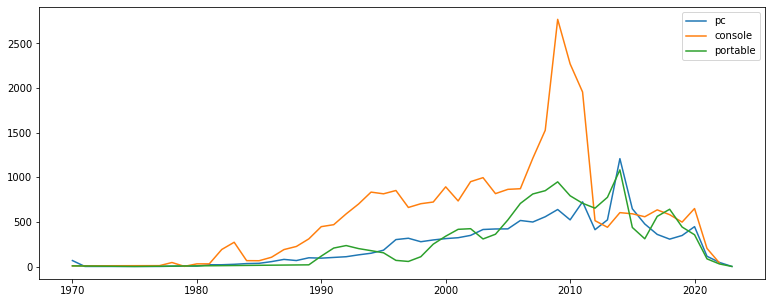

In [921]:
fig, ax1 = plt.subplots(figsize=(13, 5))

for group in df.Platform_2.unique():
  x = df[~filt][df.Platform_2 == group].Year.value_counts().sort_index().index
  y = df[~filt][df.Platform_2 == group].Year.value_counts().sort_index().values
  ax1.plot(x, y, label=group)

ax1.legend()

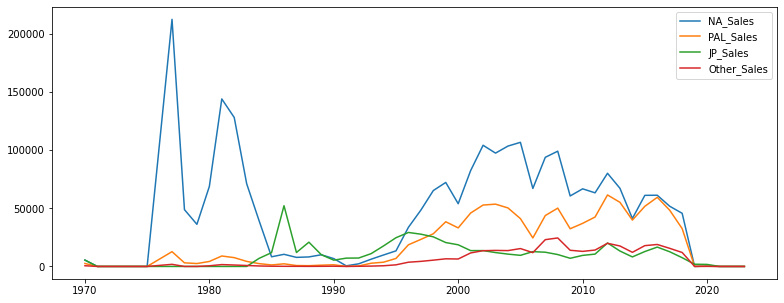

In [932]:
fig, ax1 = plt.subplots(figsize=(13, 5))

region_list = ['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']

for region in region_list:
  ax1.plot(df[~filt].groupby('Year')[region].mean().index, df[~filt].groupby('Year')[region].mean().values, label=region)

ax1.legend()

In [935]:
df.Genre.value_counts().index

Index(['Misc', 'Action', 'Adventure', 'Sports', 'Role-Playing', 'Shooter',
       'Platform', 'Strategy', 'Puzzle', 'Racing', 'Simulation', 'Fighting',
       'Action-Adventure', 'Visual Novel', 'Music', 'Party', 'MMO',
       'Education', 'Board Game', 'Sandbox'],
      dtype='object')

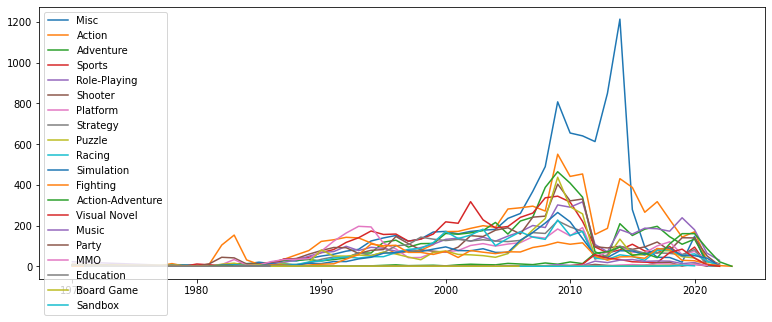

In [939]:
fig, ax1 = plt.subplots(figsize=(13, 5))

genre_list = df.Genre.value_counts().index

for genre in genre_list:
  x = df[~filt][df.Genre == genre].Year.value_counts().sort_index().index
  y = df[~filt][df.Genre == genre].Year.value_counts().sort_index().values
  ax1.plot(x, y, label=genre)

ax1.legend()

## 지역에 따른 분석